In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining the path
path = r'C:\Users\dog\Desktop\Instacart Basket Analysis'


In [3]:
# importing pickle file with most recent data
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_custmrs.pkl'))

In [4]:
#checking imported file 
df_ords_prods_cust.shape

(32404859, 35)

In [5]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   order_id                   int64   
 1   user_id                    int64   
 2   eval_set                   object  
 3   order_number               int64   
 4   order_dow                  int64   
 5   order_hour_of_day          int64   
 6   days_since_prior_order     float64 
 7   product_id                 int64   
 8   add_to_cart_order          int64   
 9   reordered                  int64   
 10  Unnamed: 0                 int64   
 11  product_name               object  
 12  aisle_id                   int64   
 13  department_id              int64   
 14  prices                     float64 
 15  _merge                     category
 16  price_range_loc            object  
 17  busiest_day                object  
 18  busiest_days_new           object  
 19  busiest_hours      

<AxesSubplot:>

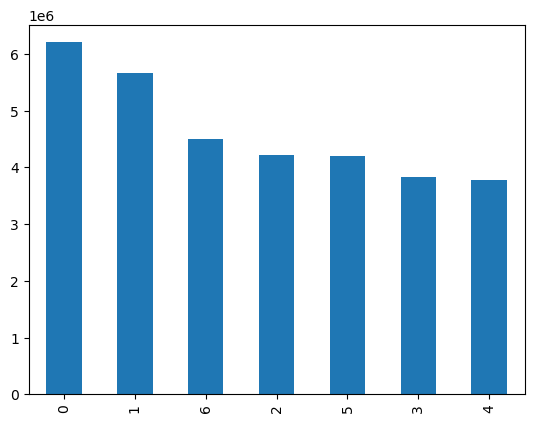

In [6]:
# creating  bar charts
df_ords_prods_cust['order_dow'].value_counts().plot.bar()

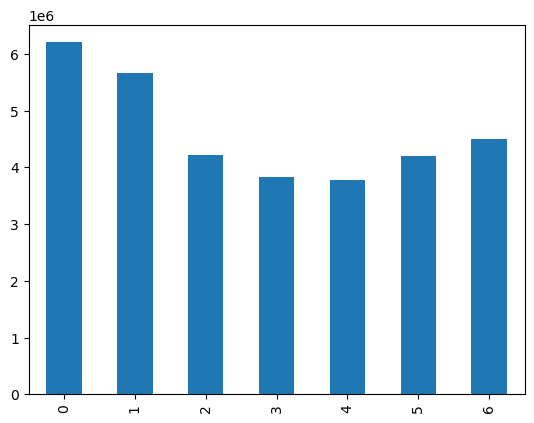

In [75]:
#sorting by dow (index)
barchart_order_dow = df_ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar()

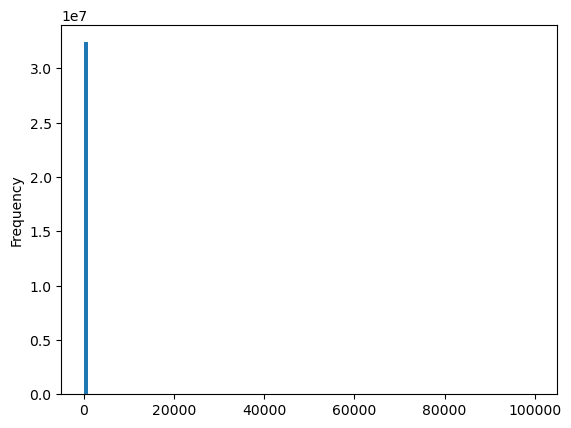

In [10]:
#creating histogram for prices
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

In [11]:
# fixing problem with the outliers
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [13]:
# checking the max price 
df_ords_prods_cust['prices'].max()

25.0

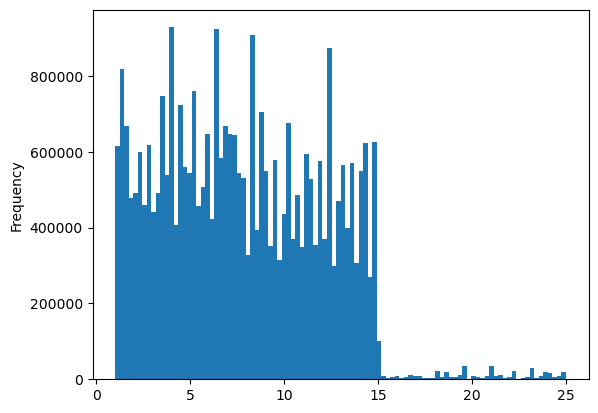

In [14]:
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

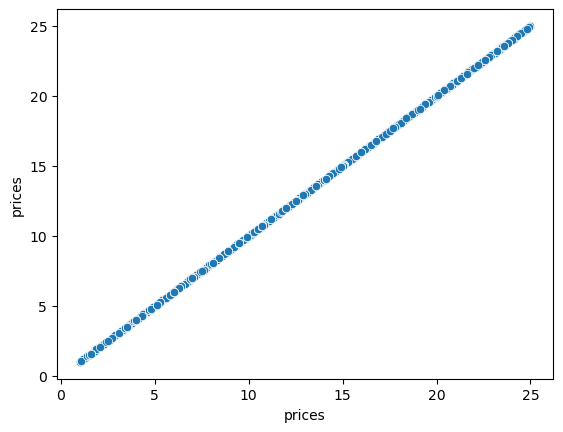

In [16]:
# creating scatterplot
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust)

In [ ]:
# creating a subset of data for the line chart


In [17]:
# defining seed
np.random.seed(3)


### i have chosen to split data by 80/20 % due to memory shortage

In [19]:
# creating new list holding true/ false values to test np.random.rand() <= 0.8 called dev
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.8

In [23]:
# checking if tnew list was created
dev


array([ True,  True,  True, ...,  True,  True,  True])

In [24]:
# separating data by creating big and small samples 
big_sample = df_ords_prods_cust[dev]

In [25]:
small_sample = df_ords_prods_cust[~dev]

In [26]:
#checking amount of rows of the list
len(dev)

32404859

In [27]:
# checking if the sum of both creates same length
len(big_sample) + len(small_sample)

32404859

In [28]:
# creating a subset data frame for our line chart
df_small = small_sample[['order_dow','prices']]

In [32]:
#checking if the data frame was created
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479642 entries, 4 to 32404853
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   order_dow  int64  
 1   prices     float64
dtypes: float64(1), int64(1)
memory usage: 148.3 MB


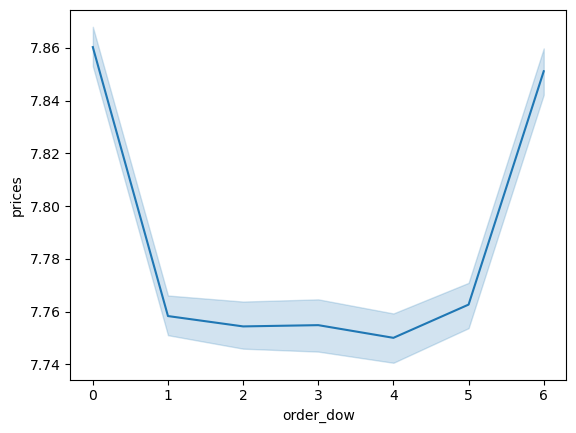

In [33]:
# creating a line chart
line_chart_dow_prices = sns.lineplot(data = df_small, x = 'order_dow',y = 'prices')

### you need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

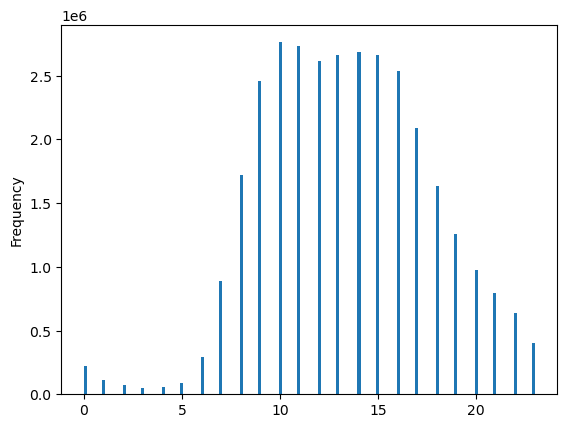

In [35]:
hist_order_hour_of_day = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 150)

#### Hystogram above shows us the frequency of orders per hour in the entire data frame. 

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

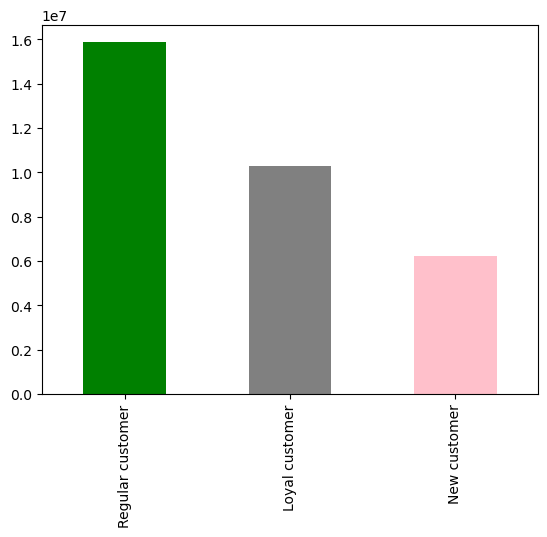

In [49]:
#creating a bar chart
barchart_customer_loyalty = df_ords_prods_cust['customers_loyalty'].value_counts().plot.bar(color = ['green', 'grey', 'pink'])

#### barchart demonstrates us amount of customers per category. most customers are in category regular. 

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [52]:
# creating a line chart. For this first we need a subset df
df_order_hour_of_day_prices = small_sample[['order_hour_of_day','prices']]

In [54]:
#checking if df was created
df_order_hour_of_day_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479642 entries, 4 to 32404853
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 406.3 MB


In [56]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
4,15,9.0
5,7,9.0
29,7,3.0
30,9,3.0
32,16,3.0


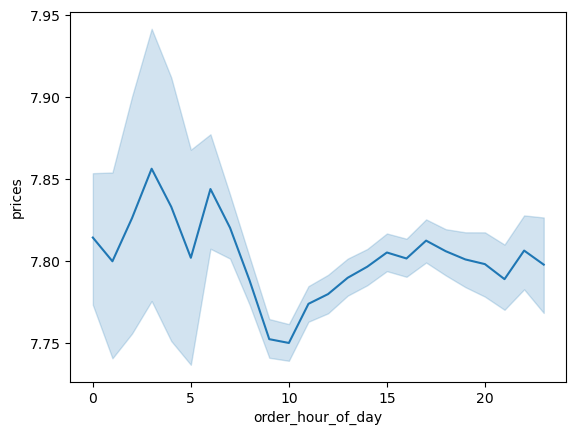

In [57]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

#### the line chart above shows frequency of orders per hour

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

### In a markdown cell beneath your line chart, describe what the line chart shows.

In [58]:
#creating subset for the line chart 
df_age_dependants = small_sample[['age','number_dependants']]

In [59]:
# displaying basic statistics
df_age_dependants.head()

,age,number_dependants
4,31,3
5,31,3
29,31,3
30,31,3
32,31,3


In [60]:
df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479642 entries, 4 to 32404853
Data columns (total 2 columns):
 #   Column             Dtype
---  ------             -----
 0   age                int64
 1   number_dependants  int64
dtypes: int64(2)
memory usage: 406.3 MB


In [ ]:
 
df_age_dependants.describe()

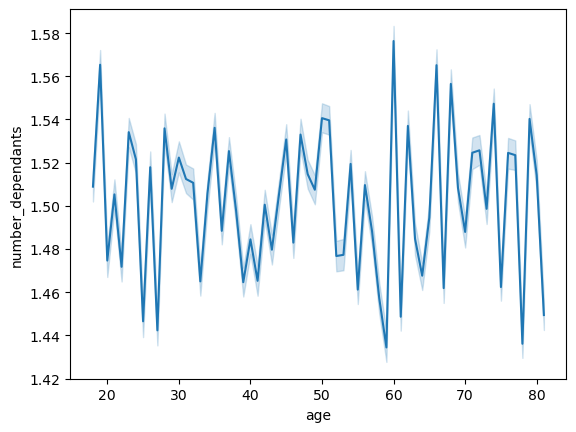

In [63]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')

#### line chart above shows amount of dependants based on age. It is impossible to target customers based on that chart, since it is pretty chaotic

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [64]:
# defining df subset for scatterplot
df_age_income = small_sample[['age','income']]

In [65]:
# checking if the df was created
df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479642 entries, 4 to 32404853
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 406.3 MB


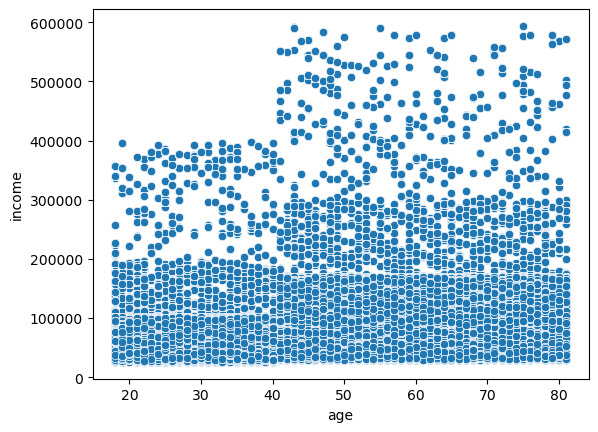

In [66]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

#### Scatterplot above shows age at the x axis and income at the y axis. we can see that as higher the age is as higher the age is as higher the income is, making this customers group more "spendpowerfull" comparing to the age <40. However the majority of the customers between 40 and 80 years old have invome around 220000 with progression of increasing income as higher the age is.

###  Export your visualizations as “.png” files in your relevant project folder.

In [77]:
barchart_order_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_order_dow04.01.png'))

In [78]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices04.01.png'))

In [79]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices04.01.png'))

In [80]:
line_chart_dow_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_dow_prices04.01.png'))

In [81]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day04.01.png'))

In [82]:
barchart_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_customer_loyalty04.01.png'))

In [83]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices04.01.png'))

In [84]:
line_chart_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependants04.01.png'))

In [85]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income04.01.png'))